In [21]:
import pandas as pd

df=pd.read_csv("d:/data/ozone/ozone2.csv")
df.head()

,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,41.00000,0
1,118.000000,8.0,72,36.00000,0
2,149.000000,12.6,74,12.00000,0
3,313.000000,11.5,62,18.00000,0
4,185.931507,14.3,56,42.12931,1


In [22]:
df.groupby("Result").mean() # 오존량 분류를 기준으로 한 평균값들

,Solar.R,Wind,Temp,Ozone
Result,,,,
0,166.302702,11.270833,72.652778,20.902778
1,203.379334,8.790123,82.530864,60.997339


In [23]:
df["Result"].value_counts()

1    81
0    72
Name: Result, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

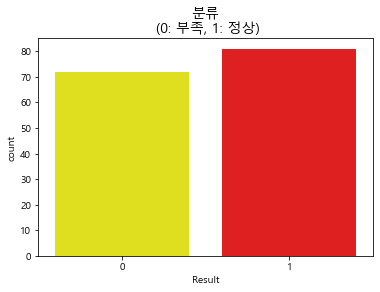

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc('font',family=font_name)

colors=['yellow','red']

sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)
# 불균형 데이터셋

In [25]:
cols=['Solar.R', 'Wind', 'Temp']
X=df[cols]
y=df['Result']

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>]], dtype=object)

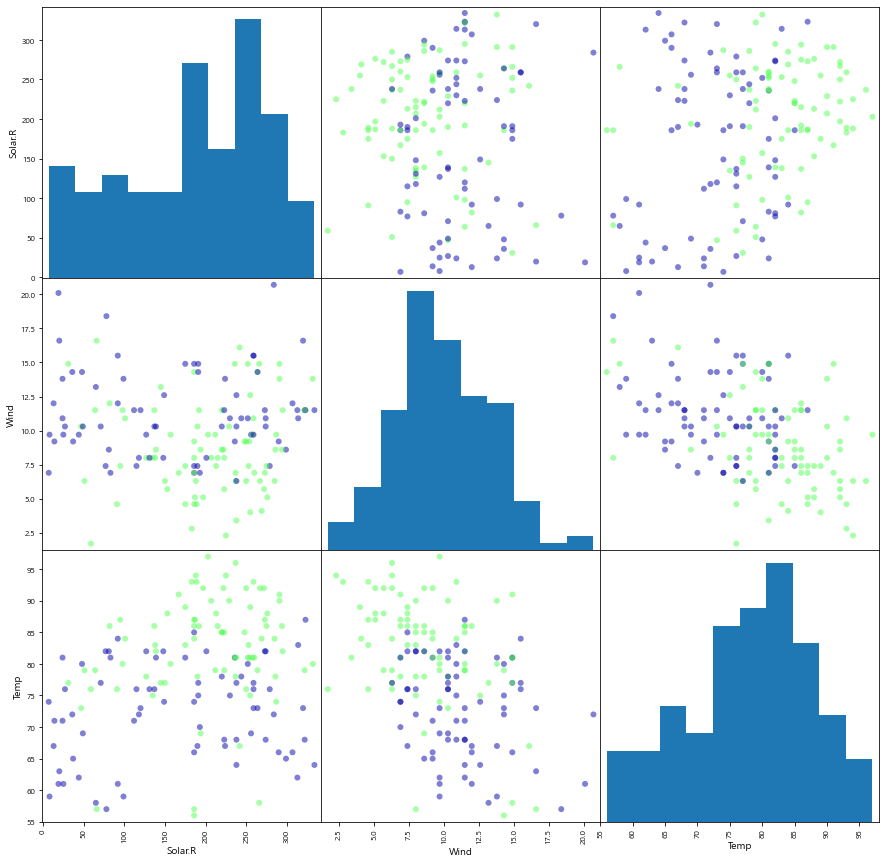

In [26]:
import mglearn

pd.plotting.scatter_matrix(X, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3) # 산점도 행렬 출력

In [27]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Result'])
df_samp=pd.concat([X_samp,y_samp], axis=1)

In [28]:
df_samp["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

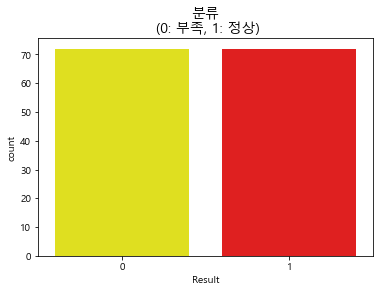

In [29]:
sns.countplot('Result', data=df_samp, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [30]:
cols=['Solar.R', 'Wind', 'Temp']
X=X_samp[cols]
y=y_samp['Result']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

최적의 k : 1


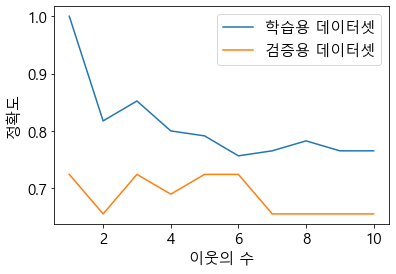

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_rate=[]
test_rate=[]
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1에서 10까지 n_neighbors를 적용
neighbors=range(1,11)

for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n) # 모델 생성
    knn.fit(X_train, y_train)
    train_rate.append(knn.score(X_train, y_train)) # 학습용 데이터셋의 정확도
    test_rate.append(knn.score(X_test, y_test)) # 검증용 데이터셋의 정확도

plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.xlabel("이웃의 수")
plt.ylabel("정확도")
plt.legend()

max_rate=max(test_rate)
idx=np.argmax(test_rate)
print('최적의 k :', idx+1)
# 학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.
# 5개를 사용했을 때 테스트 정확도가 가장 높다.

In [33]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
pred=model.predict(X_test)
print("학습용 :",model.score(X_train, y_train))
print("검증용 :",model.score(X_test, y_test))
print("검증용 :",np.mean(pred==y_test))

학습용 : 1.0
검증용 : 0.7241379310344828
검증용 : 0.7241379310344828


In [35]:
# confusion matrix 출력
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,pred)
cm

array([[10,  4],
       [ 4, 11]], dtype=int64)

In [36]:
df_cm=pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,10,4
1,4,11


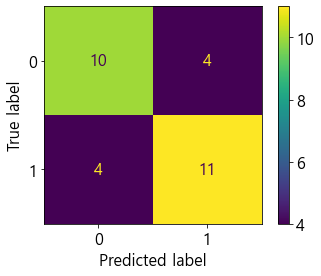

In [37]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size':16})
plot_confusion_matrix(model, X_test, y_test)